# Gradient Descent Methods

### The Method of Steepest Descent

In [1]:
import numpy as np
import scipy.optimize as opt
import scipy.linalg as la

def exact_gradient(f, df, x0, *, tol=10**-5, maxiter=100):
    
    i = 0
    xk = x0
    conv = False
    
    while i < maxiter:
        
        Df = np.array(df(xk))
        
        res = opt.minimize_scalar(lambda a: f(xk - a*Df.T))
        α = res.x
        
        xk = xk - α * Df.T
        
        if la.norm(df(xk), np.inf) < tol:
            conv = True
            break
        
        i += 1
            
    return xk, conv, i

In [2]:
# Test function 1
f = lambda x: x[0]**4 + x[1]**4 + x[2]**4
df = lambda x: (4*x[0]**3, 4*x[1]**3, 4*x[2]**3)
x0 = np.array([1, 1, 1])
exact_gradient(f, df, x0)

(array([9.24407773e-10, 9.24407773e-10, 9.24407773e-10]), True, 0)

In [3]:
# Test function 2
f = opt.rosen # The Rosenbrock function.
df = opt.rosen_der # The first derivative.
x0 = np.array([-2, 2, 2])
exact_gradient(f, df, x0, maxiter = 30000)

(array([0.99999589, 0.99999177, 0.99998349]), True, 16569)

### The Conjugate Gradient Method

In [4]:
def conjugate_gradient(x0, Q, b, *, tol = 10**-5, maxiter=None):
    
    i = 0
    conv = False
    maxiter = len(Q)
    
    r0 = np.matmul(Q, x0) - b
    d0 = -r0
    
    xk = x0
    rk = r0
    dk = d0
    
    while i < maxiter:
        
        αk = np.matmul(rk.T, rk) / np.matmul(np.matmul(dk.T, Q), dk)
        xk = xk + αk * dk
        rkk = rk + αk * np.matmul(Q, dk)
        βk = np.matmul(rkk.T, rkk) / np.matmul(rk.T, rk)
        dk = -rkk + βk * dk
        rk = rkk
        
        if la.norm(rk) < tol:
            conv = True
            break
            
        i += 1
            
    return xk, conv, i

In [5]:
# Test function 1
Q = np.array([[2, 0], [0, 4]])
b = np.array([1, 8])
x0 = np.array([-100, 100])
conjugate_gradient(x0, Q, b)

(array([0.5, 2. ]), True, 1)

In [6]:
# Test function 2
n = 10
A = np.random.random((n,n))
Q = A.T @ A
b, x0 = np.random.random((2,n))
conjugate_gradient(x0, Q, b, tol=10**-1) ## kinda close

(array([ -53.44866154,  -52.78740066,   -9.84786578,   31.04199685,
        -107.27072197,    5.72208035,   39.03059114,    3.98314124,
          67.3090515 ,   96.27578702]), True, 9)

In [7]:
la.solve(Q, b)

array([ -53.42199178,  -52.76372292,   -9.8518815 ,   31.10953785,
       -107.30787669,    5.66566291,   38.89793488,    4.07329944,
         67.19998504,   96.41029833])

### Non-linear Conjugate Gradient

In [8]:
def non_linear_conjugate_gradient(f, df, x0, *, tol = 10**-5, maxiter=100):
    
    i = 0
    conv = False
    
    r0 = -np.array(df(x0)).T
    d0 = -r0
    res = opt.minimize_scalar(lambda a: f(x0 - a*d0))
    α0 = res.x
    
    xk = x0 + α0*d0
    rk = r0
    dk = d0
    
    while i < maxiter:
        
        rkk = -np.array(df(xk)).T
        βk = np.matmul(rkk.T, rkk) / np.matmul(rk.T, rk)
        dk = rkk + βk * dk
        res = opt.minimize_scalar(lambda a: f(xk - a*dk))
        αk = res.x
        xk = xk + αk * dk
        rk = rkk
        
        if la.norm(rk) < tol:
            conv = True
            break
            
        i += 1
            
    return xk, conv, i

In [9]:
non_linear_conjugate_gradient(opt.rosen, opt.rosen_der, np.array([10, 10]), maxiter=10000)

(array([105.75210177,   5.21106108]), False, 10000)

In [10]:
opt.fmin_cg(opt.rosen, np.array([10, 10]), fprime=opt.rosen_der)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 44
         Function evaluations: 122
         Gradient evaluations: 119


array([0.99999606, 0.9999921 ])

### Regression Problems

In [11]:
data = np.loadtxt("linregression.txt")

In [12]:
y = data[:, 0]

In [13]:
y

array([60323., 61122., 60171., 61187., 63221., 63639., 64989., 63761.,
       66019., 67857., 68169., 66513., 68655., 69564., 69331., 70551.])

In [14]:
X = data[:, 1:] # But we have to add the constant
X = np.hstack((np.ones((X.shape[0], 1), dtype=X.dtype), X))

In [15]:
X.shape

(16, 7)

In [16]:
x0 = np.ones(X.shape[1], dtype=X.dtype)
len(x0)

7

In [17]:
conjugate_gradient(x0, np.matmul(X.T, X), np.matmul(X.T, y)) ## ??

(array([ 1.02098785,  4.88216104,  0.05952918, -0.55752397, -0.60822878,
        -0.32079157, 42.3517824 ]), False, 7)

In [18]:
β = np.matmul(la.inv(np.matmul(X.T, X)), np.matmul(X.T, y))

In [19]:
β

array([-3.48225865e+06,  1.50618727e+01, -3.58191798e-02, -2.02022981e+00,
       -1.03322687e+00, -5.11041036e-02,  1.82915147e+03])

#### Logistic Regression

In [20]:
class Logistic_Regression:
    
    def fit(self, x, y, β0):
        
        f = lambda β0: np.sum(np.log(1+np.exp(-(β0[0]+β0[1]*x))+(1-y)*(β0[0]+β0[1]*x)))
        #df = lambda β0: np.array((np.sum(-np.exp(-(β0[0]+β0[1]*x))/(1+np.exp(-(β0[0]+β0[1]*x))) + (1-y)),
                                       #np.sum(-x*np.exp(-(β0[0]+β0[1]*x))/(1+np.exp(-(β0[0]+β0[1]*x))) + (1-y)*x)))
        res = opt.fmin_cg(f, β0)
        #res = opt.fmin_cg(f, β0, fprime=df)
        
        self.b0 = res[0]
        self.b1 = res[1]
        
        return res
    
    def predict(self, x):
        
        return 1/(1+np.exp(-(self.b0+self.b1*x)))

#### Using the logistic regression model to estimate O-ring damage resect to temperature

In [21]:
data = np.load('challenger.npy')

In [22]:
data

array([[53.,  1.],
       [57.,  1.],
       [58.,  1.],
       [63.,  1.],
       [66.,  0.],
       [67.,  0.],
       [67.,  0.],
       [67.,  0.],
       [68.,  0.],
       [69.,  0.],
       [70.,  0.],
       [70.,  0.],
       [70.,  1.],
       [70.,  1.],
       [72.,  0.],
       [73.,  0.],
       [75.,  0.],
       [75.,  1.],
       [76.,  0.],
       [76.,  0.],
       [78.,  0.],
       [79.,  0.],
       [81.,  0.]])

In [23]:
x = data[:, 0]
y = data[:, 1]

In [24]:
log_reg = Logistic_Regression()

In [25]:
b = np.array([20, -1])
log_reg.fit(x, y, b)

         Current function value: 14.309601
         Iterations: 15
         Function evaluations: 448
         Gradient evaluations: 109


array([ 6.22686102, -0.08106009])

In [26]:
pred = log_reg.predict(x)

In [27]:
import matplotlib.pyplot as plt

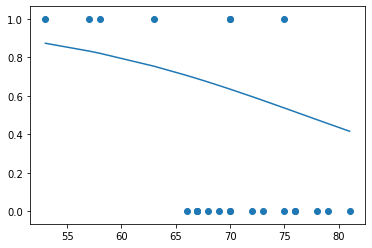

In [28]:
plt.scatter(x, y)
plt.plot(x, pred)
plt.show()

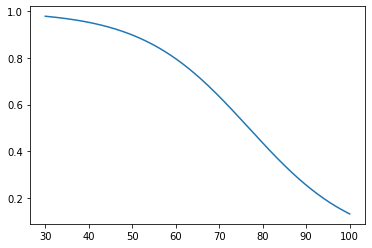

In [29]:
x_ = np.linspace(30, 100, 1000)
pred_ = log_reg.predict(x_)
plt.plot(x_, pred_)
plt.show()